Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
airbnb<-read.csv('/content/airbnb-listings (1).csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [ ]:
mi_airbnb <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]

In [ ]:
head(mi_airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [ ]:
df_madrid<-subset(mi_airbnb,(City=="Madrid") & (Room.Type=="Entire home/apt") & (Neighbourhood!=""))

In [ ]:
df_madrid <- df_madrid[,c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]

In [ ]:
df_madrid

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744
21,La Latina,2,1,1,1,89,NA,1,10,98,40.41007,-3.710624
22,Palacio,5,3,3,3,192,NA,2,12,80,40.42017,-3.712629
23,La Latina,4,1,1,1,100,NA,2,12,NA,40.40990,-3.710948


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [ ]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903

In [ ]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [ ]:
apartamentosNA<-sum(is.na(df_madrid$Square.Meters))
print(apartamentosNA)

[1] 5254


In [ ]:
apartamentos<-length(df_madrid$Square.Meters)
print(apartamentos)

[1] 5601


In [ ]:
print(paste("El porcentaje es:",apartamentosNA/apartamentos))

[1] "El porcentaje es: 0.938046777361185"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [ ]:
apartdiferentNA<-na.omit(df_madrid$Square.Meters)
print(length(apartdiferentNA))

[1] 347


In [ ]:
apartdif0m<-apartdiferentNA=="0"
sum(apartdif0m)

[1] 128

In [ ]:
print(paste("El porcentaje es:",sum(apartdif0m)/length(apartdiferentNA)))

[1] "El porcentaje es: 0.368876080691643"


Reemplazar todos los 0m^2 por NA 

In [ ]:
df_madrid$Square.Meters[df_madrid$Square.Meters=="0"] <- NA

In [ ]:
sum(is.na(df_madrid$Square.Meters))

[1] 5382

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

In [ ]:
library(ggplot2)
library(tidyverse)
library(GGally)

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


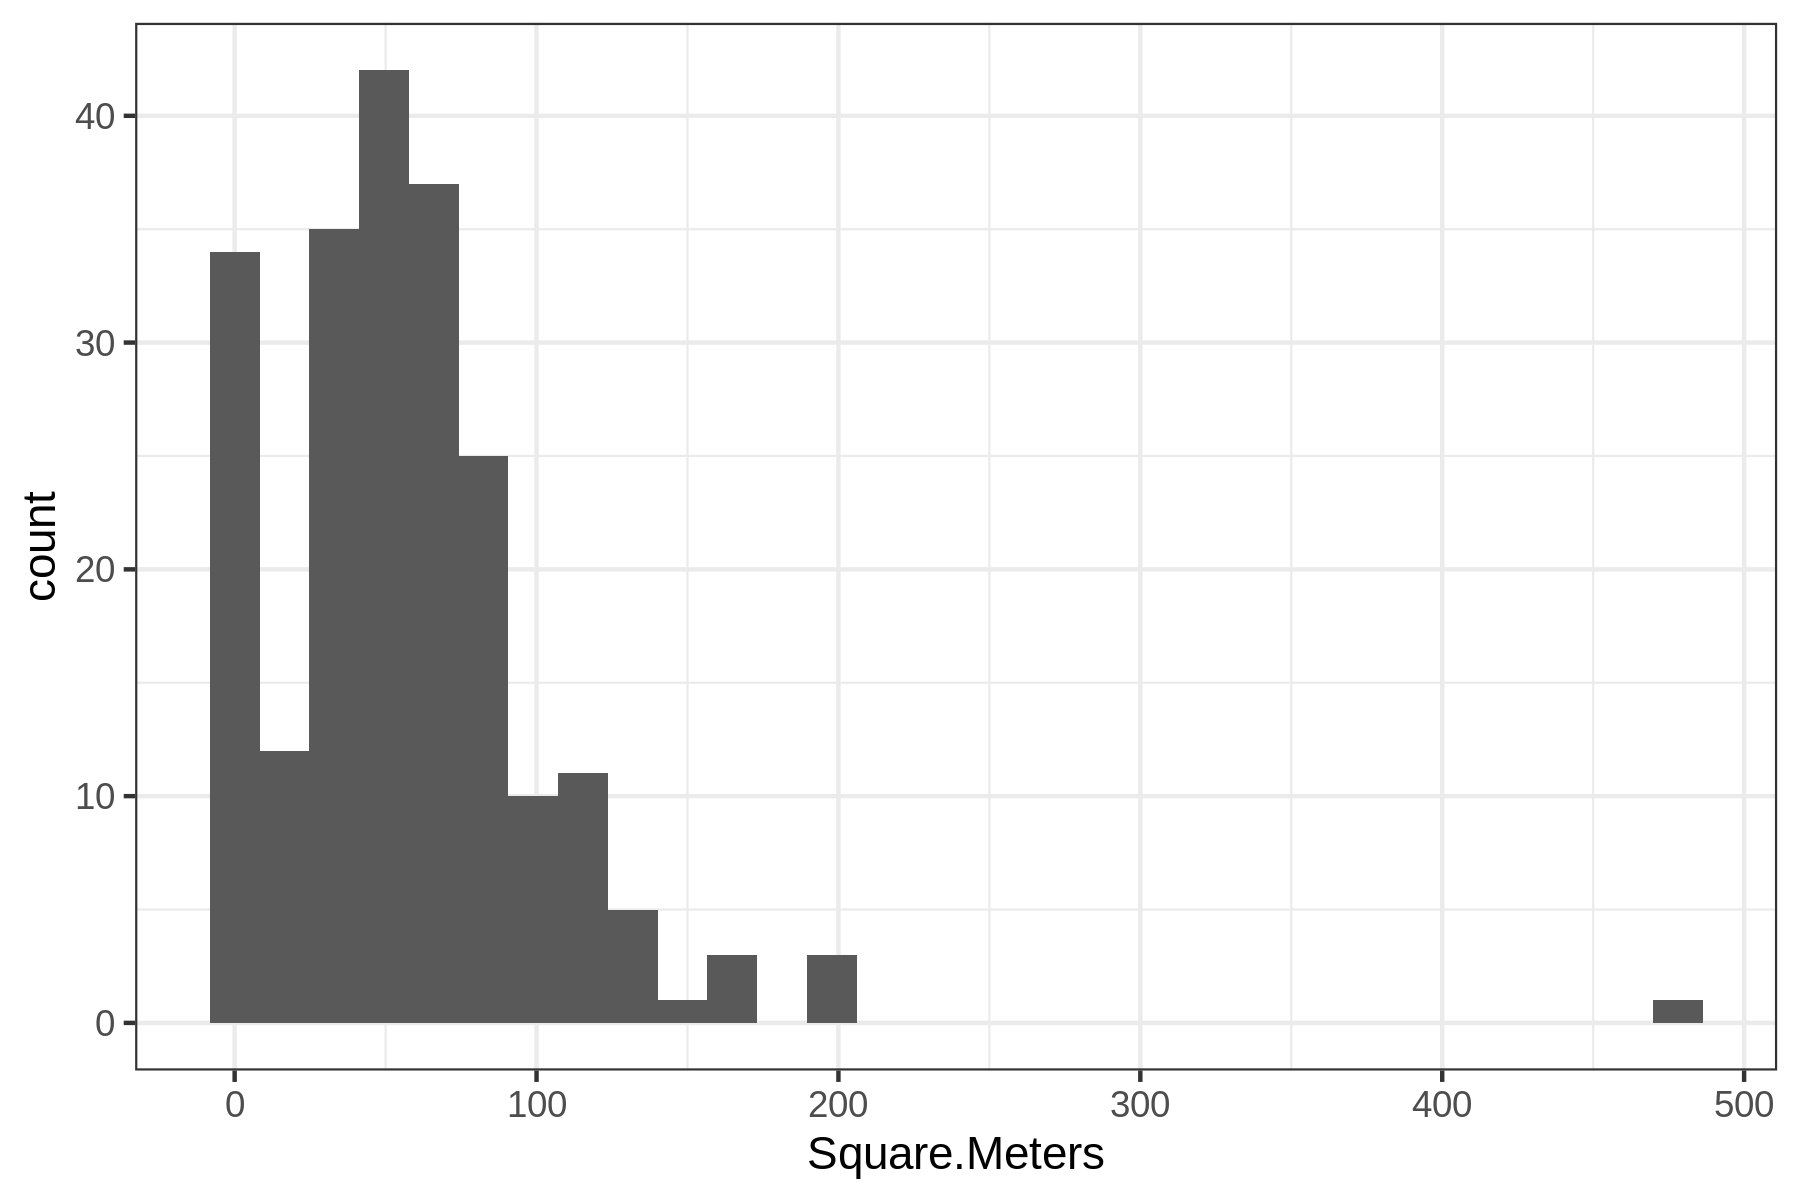

In [ ]:
ggplot(df_madrid, aes(x=Square.Meters))+geom_histogram(bins=30)+theme_bw()

A 480 metros cuadrados observamos un valor atípico descartable.
Podríamos descartar también los valores que estén por debajo de 20 metros cuadrados

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [ ]:
df_madrid$Square.Meters[df_madrid$Square.Meters<20] <- NA
df_madrid$Square.Meters[df_madrid$Square.Meters>300] <- NA

Warning message:
“Removed 5428 rows containing non-finite values (stat_bin).”


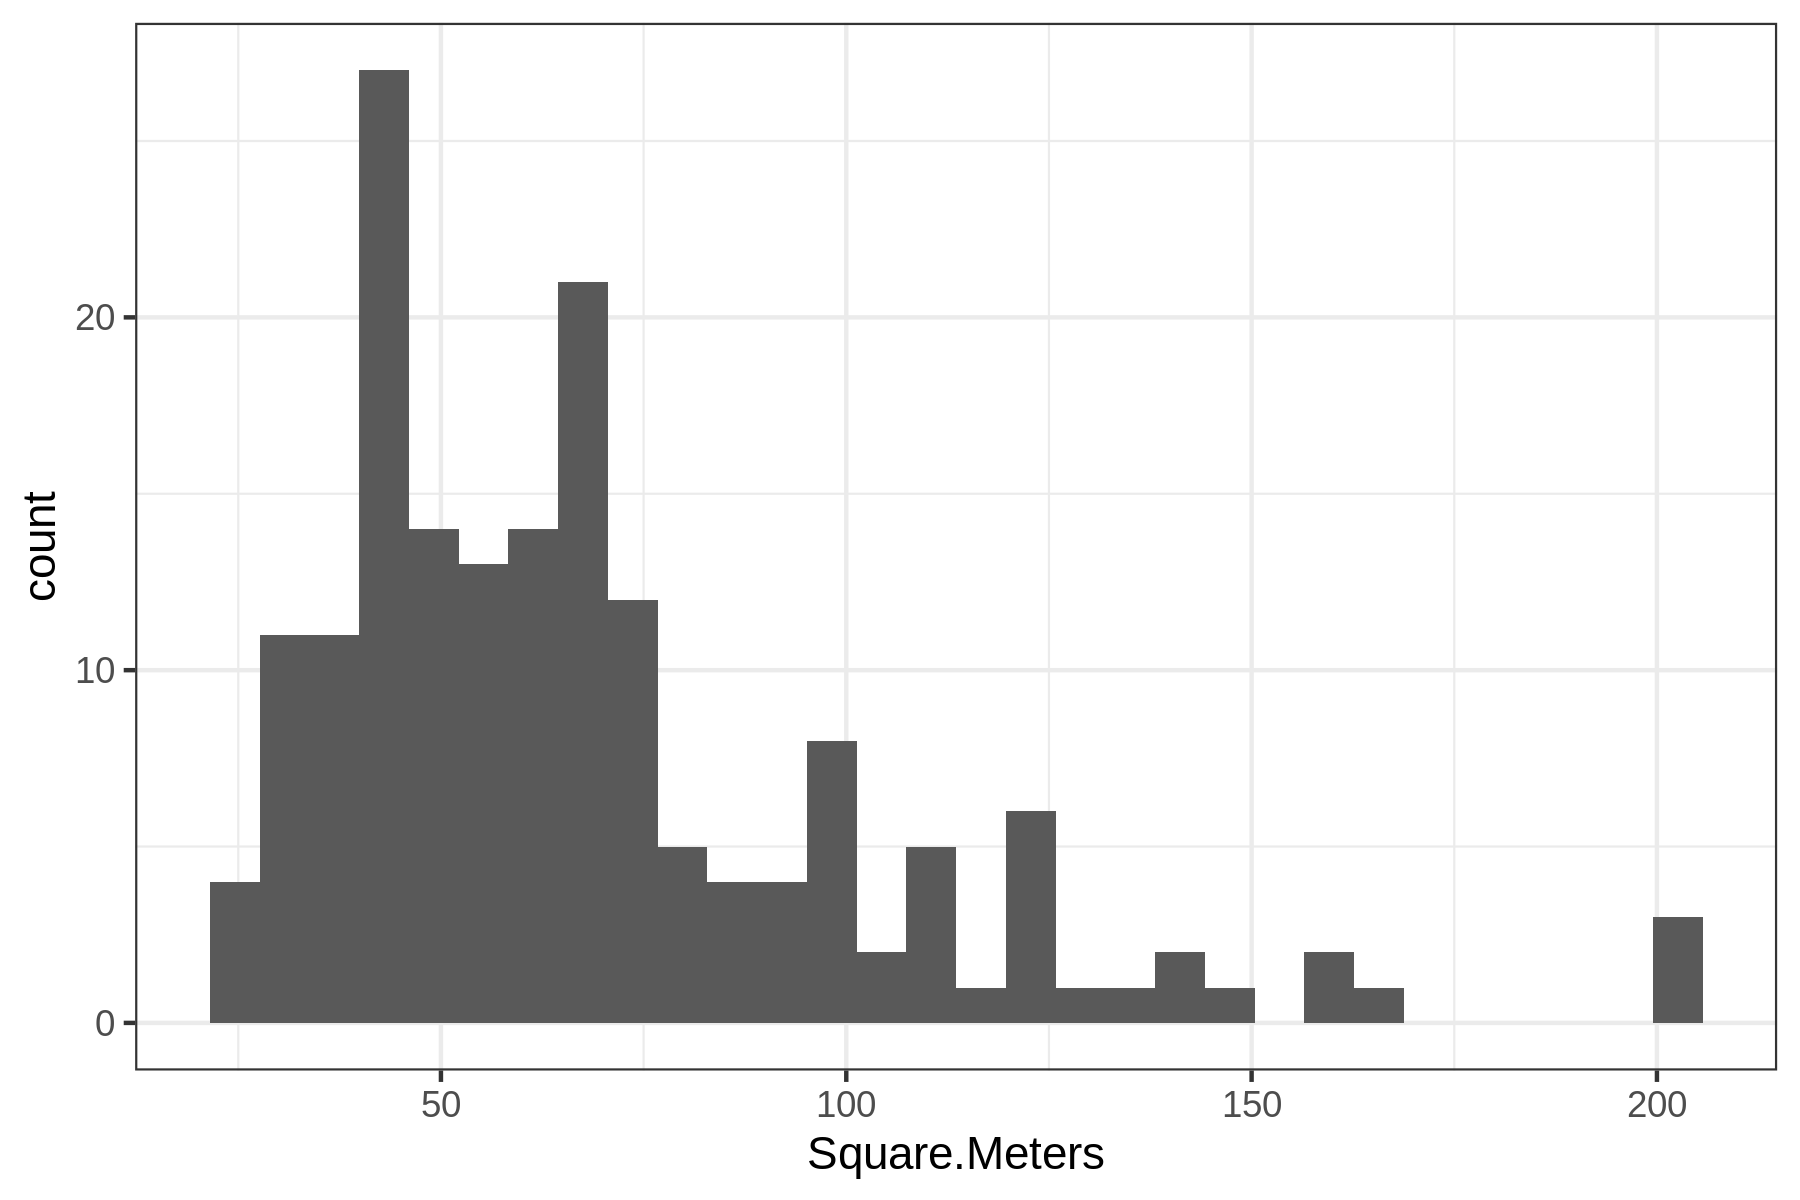

In [ ]:
ggplot(df_madrid, aes(x=Square.Meters))+geom_histogram(bins=30)+theme_bw()

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [ ]:
df_madrid=filter(df_madrid, !is.na(df_madrid$Square.Meters))

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

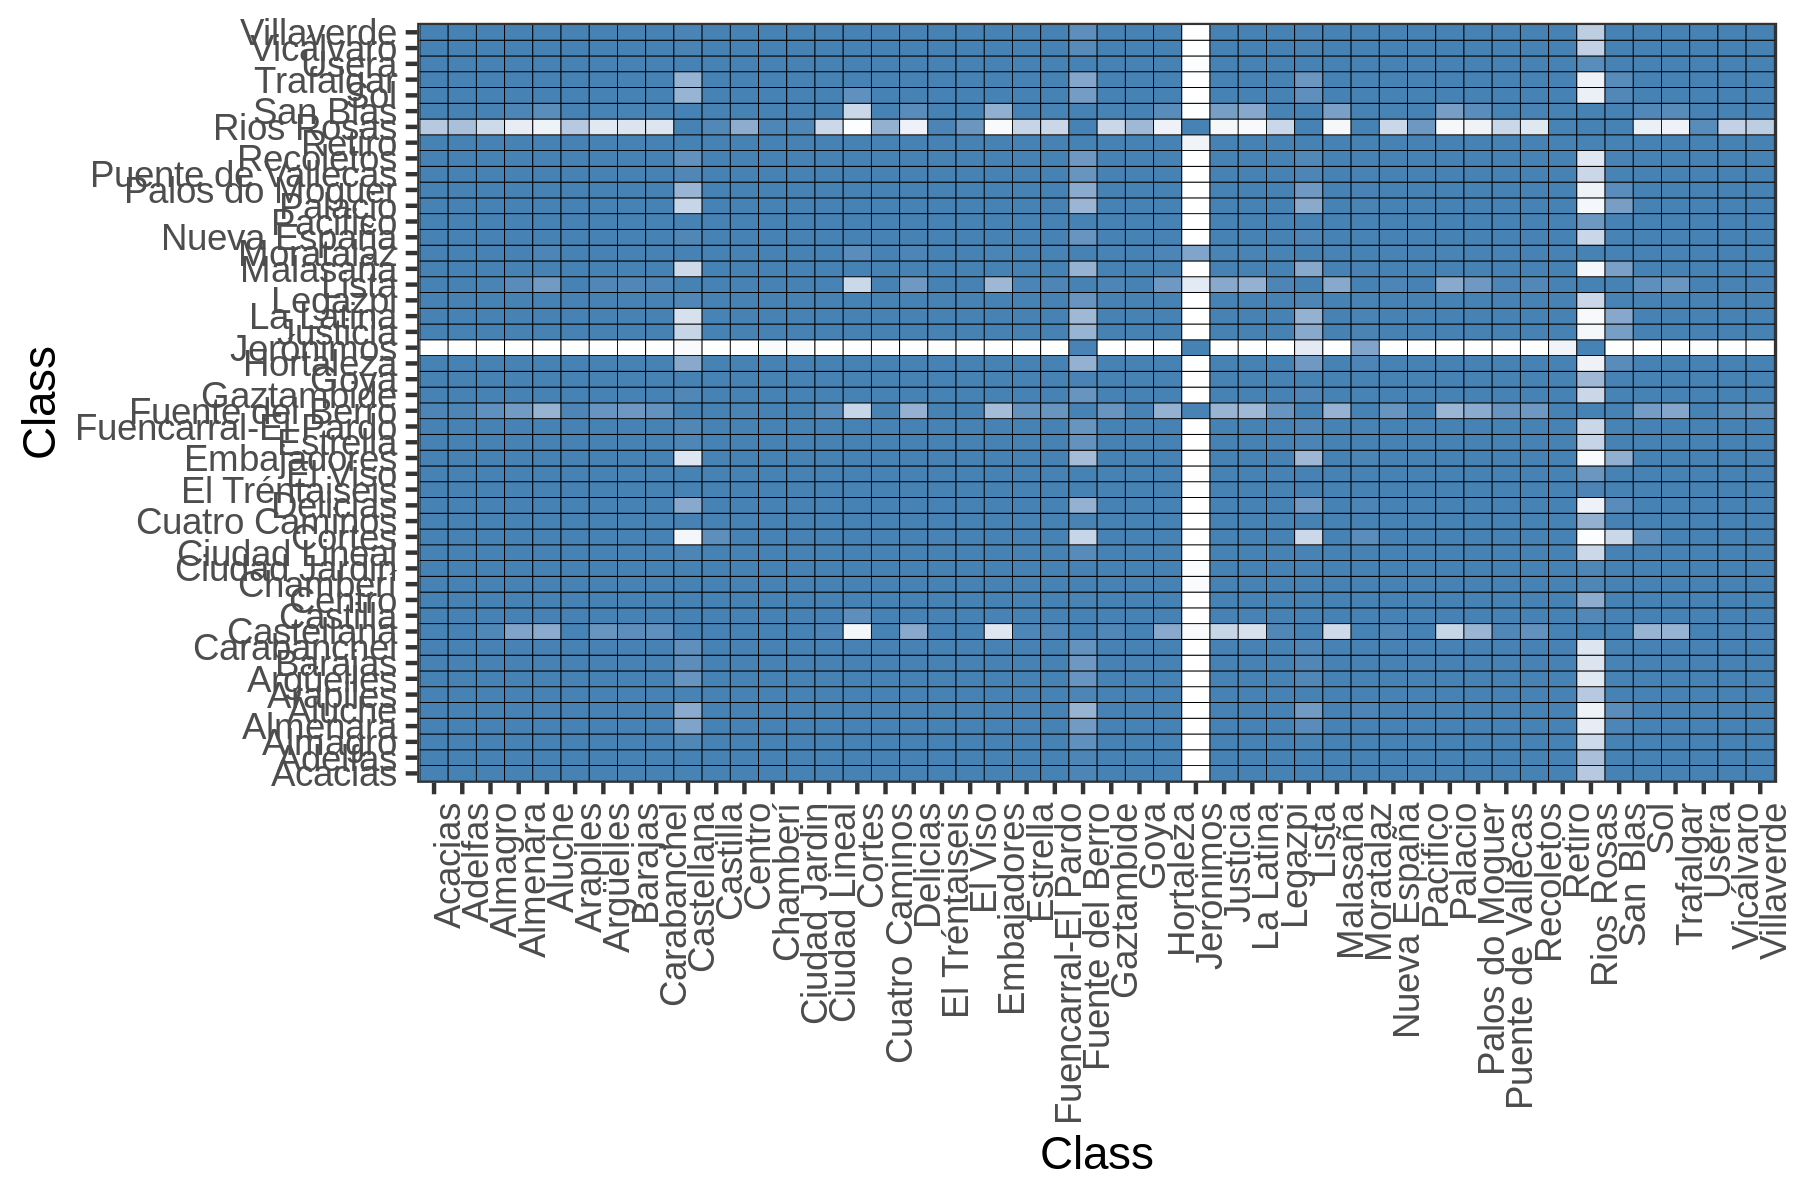

In [ ]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [ ]:
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’




In [ ]:
d=as.dist(1 - resm)

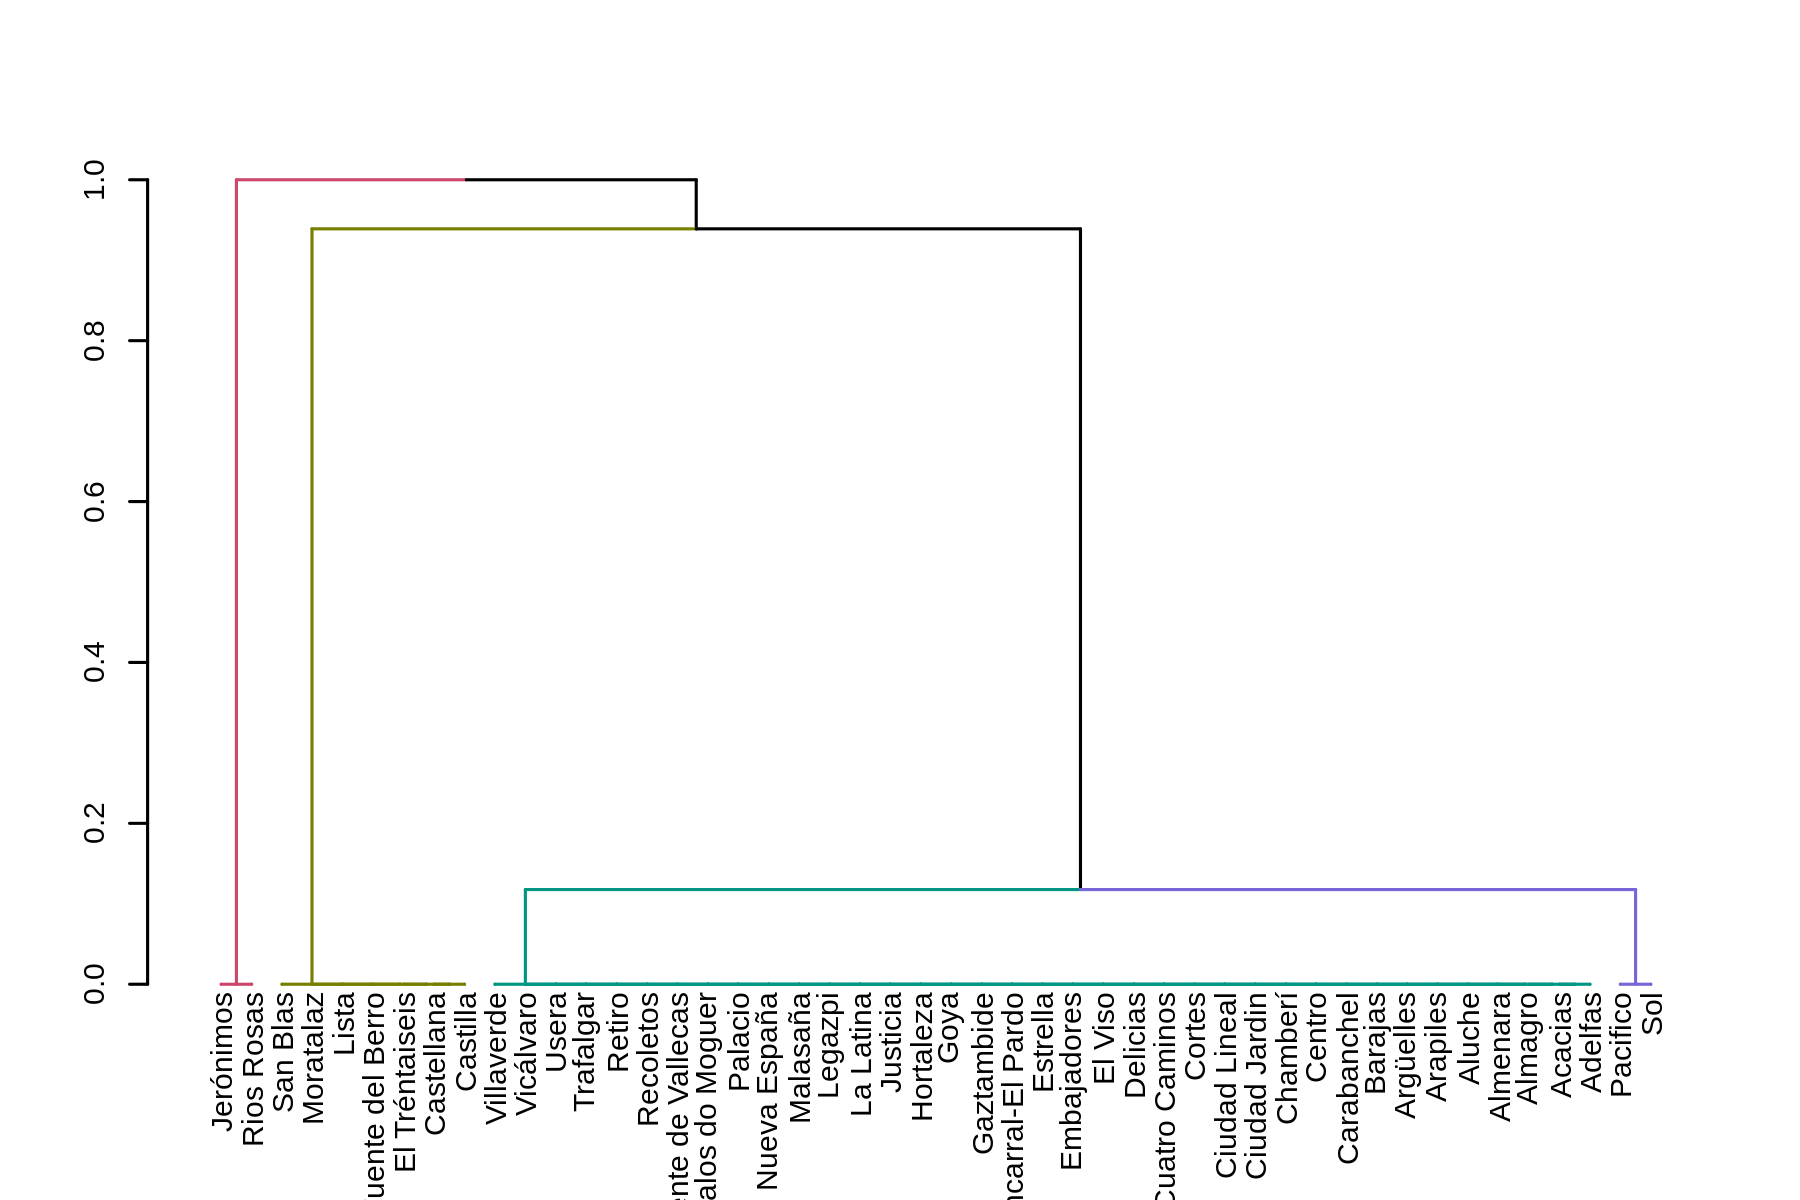

In [ ]:
library(dendextend)

arbol<- hclust(d, method="complete")
dendograma = as.dendrogram(arbol) 
par(cex=0.6)
plot(color_branches(dendograma, k=4))


¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [ ]:
El punto de corte sería por debajo de 0.9, en el que aparecen 3 clusters

In [ ]:
clusters=cutree(arbol, k=3)
clusters

Acacias             Adelfas             Almagro            Almenara 
                  1                   1                   1                   1 
             Aluche            Arapiles           Argüelles             Barajas 
                  1                   1                   1                   1 
        Carabanchel          Castellana            Castilla              Centro 
                  1                   2                   2                   1 
           Chamberí       Ciudad Jardin       Ciudad Lineal              Cortes 
                  1                   1                   1                   1 
     Cuatro Caminos            Delicias      El Tréntaiseis             El Viso 
                  1                   1                   2                   1 
        Embajadores            Estrella Fuencarral-El Pardo    Fuente del Berro 
                  1                   1                   1                   2 
         Gaztambide                Goya           Hortaleza           Jerónimos 
                  1                   1                   1                   3 
           Justicia           La Latina             Legazpi               Lista 
                  1                   1                   1                   2 
           Malasaña           Moratalaz        Nueva España            Pacifico 
                  1                   2                   1                   1 
            Palacio     Palos do Moguer  Puente de Vallecas           Recoletos 
                  1                   1                   1                   1 
             Retiro          Rios Rosas            San Blas                 Sol 
                  1                   3                   2                   1 
          Trafalgar               Usera           Vicálvaro          Villaverde 
                  1                   1                   1                   1

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [ ]:
Data <- subset( df_madrid, select = -c(Neighbourhood,Square.Feet))

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 9 rows containing missing values”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm 

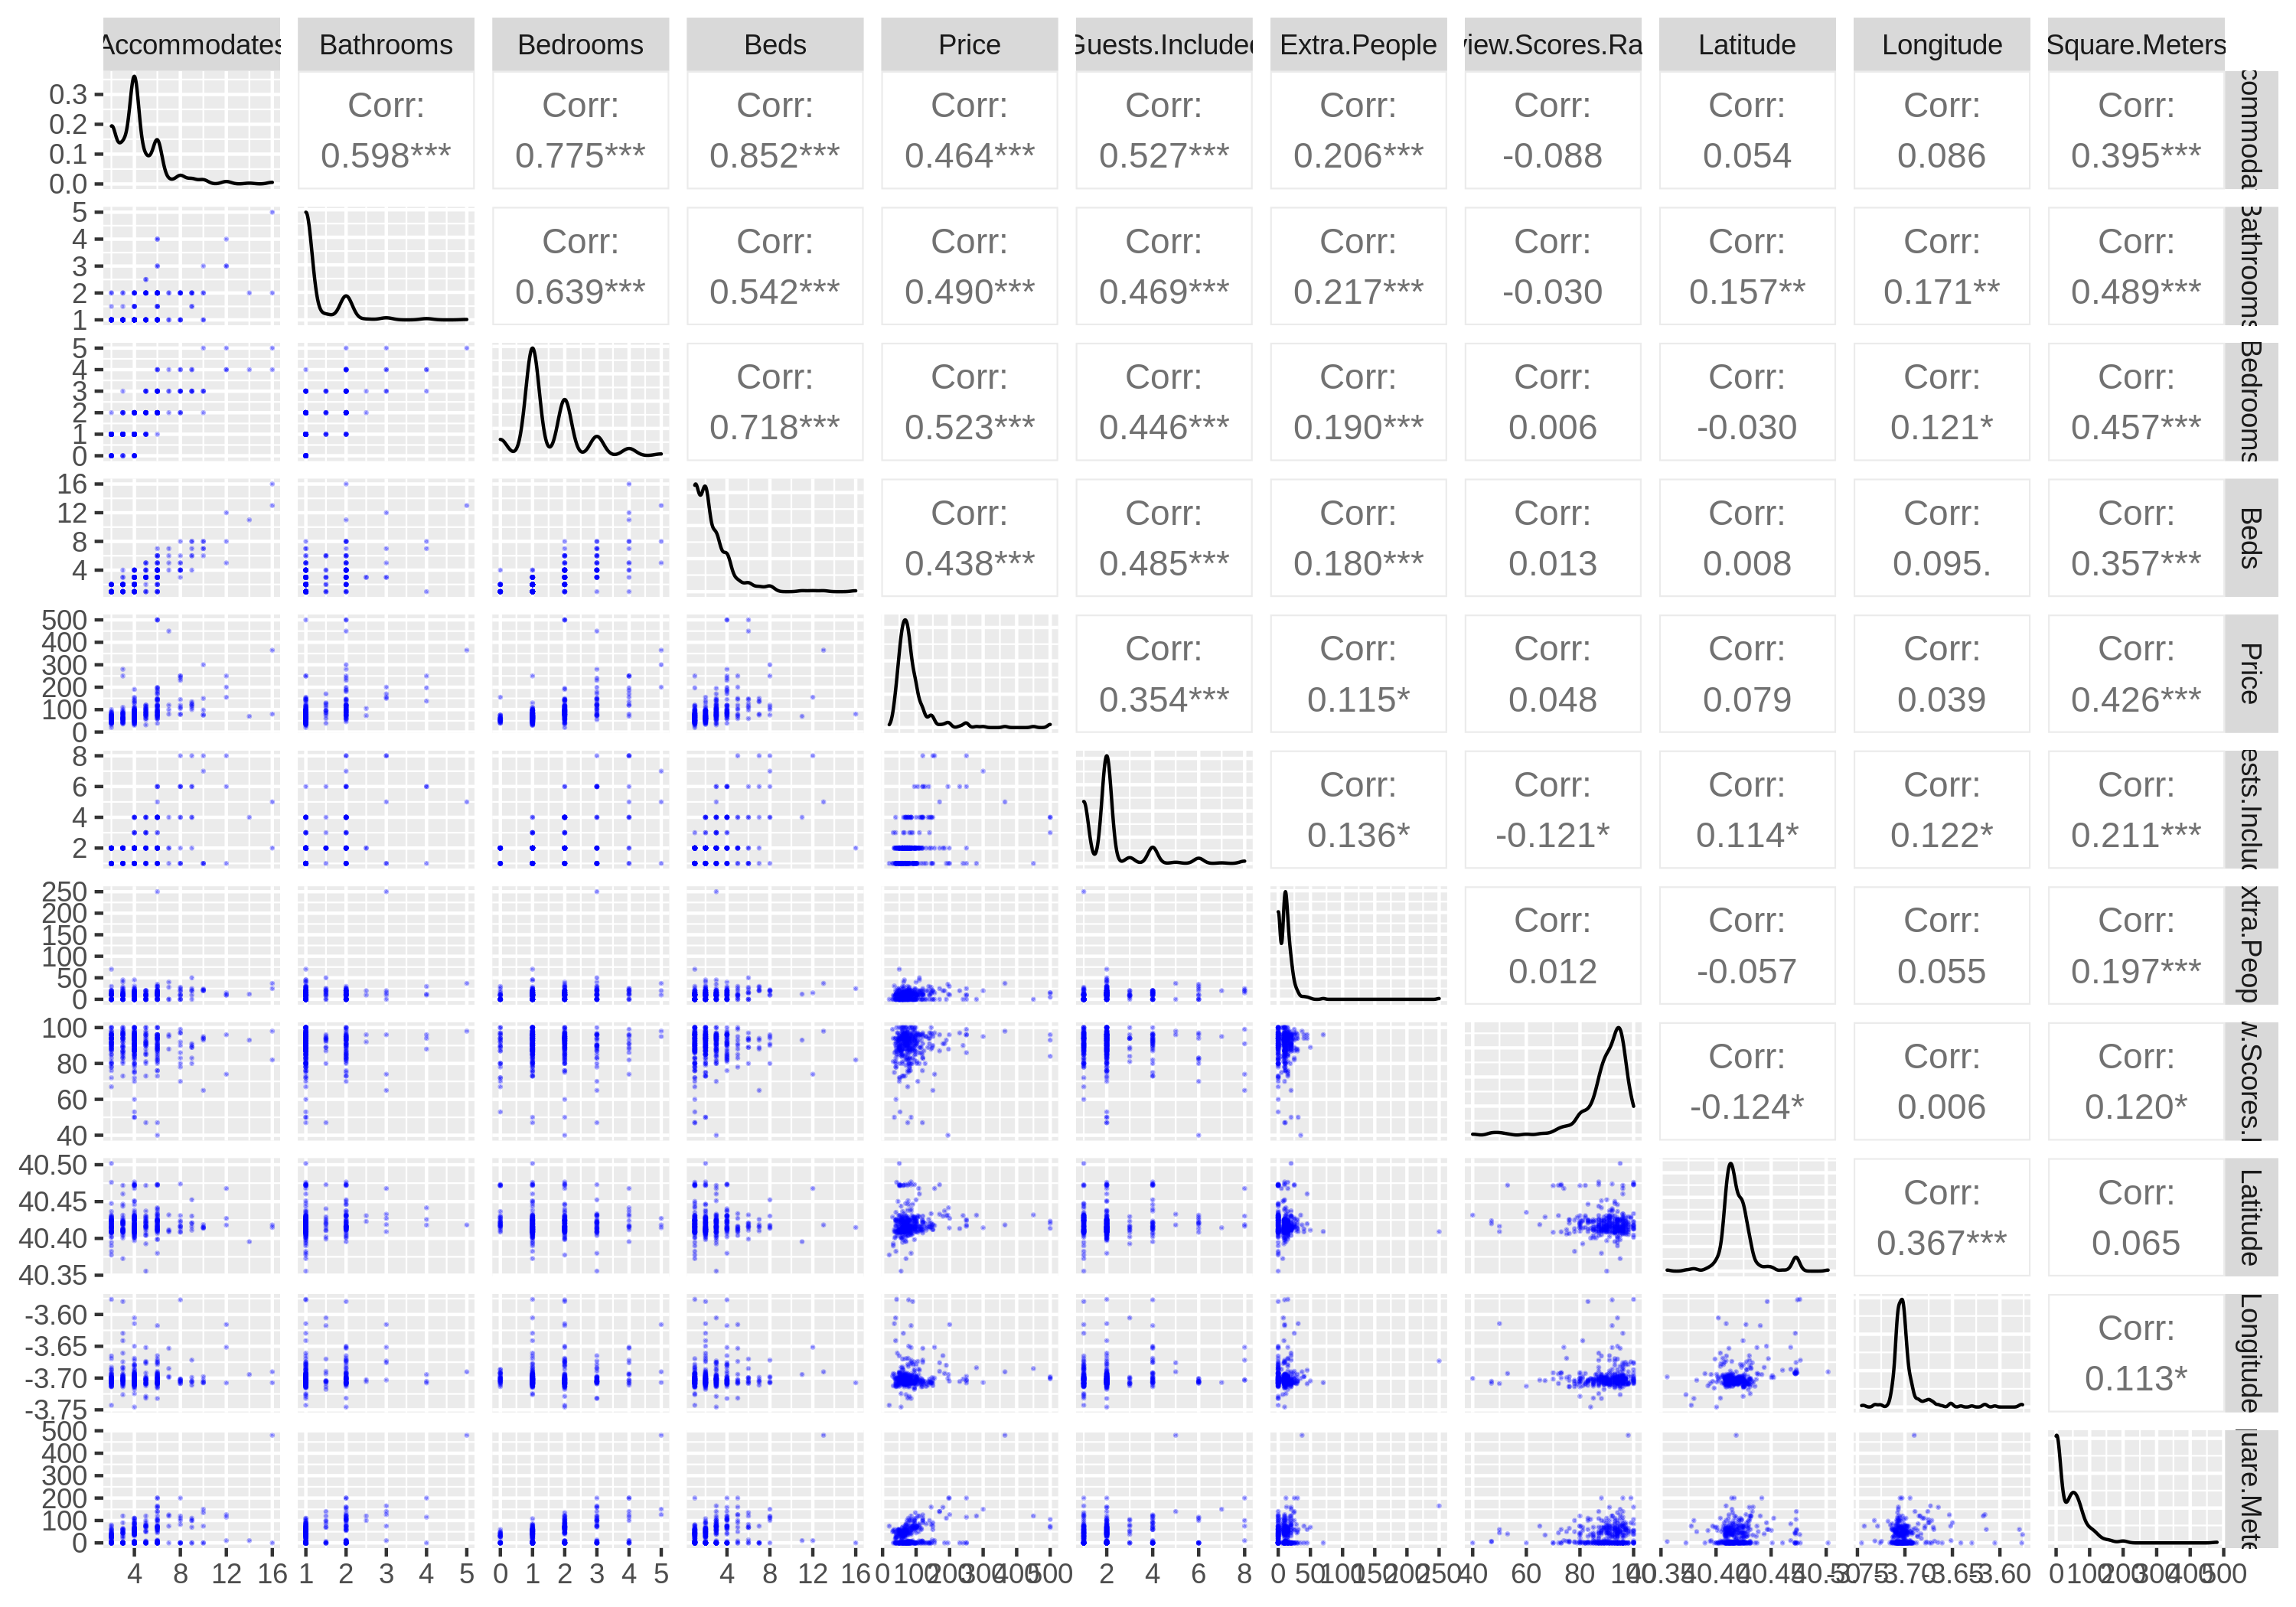

In [ ]:
library(GGally)
ggpairs(Data, 
#         lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
        ,cardinality_threshold=NULL)

In [ ]:
set.seed(123)
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
df_train<-df_madrid[idx,]
df_test <-df_madrid[-idx,]

In [ ]:
model<-lm(Square.Meters~.,data=df_train)
summary(model)

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = Square.Meters ~ ., data = df_train)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.517e-14 -6.704e-15  0.000e+00  7.354e-15  1.020e-13 

Coefficients:
                                  Estimate Std. Error    t value Pr(>|t|)    
(Intercept)                     -1.371e-11  1.807e-11 -7.590e-01  0.44892    
NeighbourhoodAdelfas             3.941e-14  2.742e-14  1.437e+00  0.15249    
NeighbourhoodAlmagro             3.739e-14  2.859e-14  1.308e+00  0.19264    
NeighbourhoodAlmenara           -1.186e-14  3.908e-14 -3.030e-01  0.76189    
NeighbourhoodAluche              2.741e-14  3.323e-14  8.250e-01  0.41054    
NeighbourhoodArapiles           -1.391e-14  2.549e-14 -5.460e-01  0.58594    
NeighbourhoodArgüelles          -1.601e-14  1.998e-14 -8.020e-01  0.42385    
NeighbourhoodBarajas             3.051e-14  8.716e-14  3.500e-01  0.72674    
NeighbourhoodCarabanchel         2.788e-15  2.004e-14  1.390e-01  0.88954    
NeighbourhoodCastilla    

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?